#Proyecto Final

Para el proyecto final, se aplicara una tecnica de clasificación con el propósito de clasificar correctamente el ICA (índice de la Calidad del Aire), mediante los parametros de entrada (los 6 contaminantes más importantes).

## Librerías

Empezamos con la implementación de librerías a ocupar dentro de nuestro modelo de clasificación, además de las metricas para evaluarlo, funciones para visualizar histogramas y que nos ayudaran a dividir nuestros datos en entrenamineto y testeo.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

## Lectura y Evaluación de los Datos

Se almacenaran los datos dentro de un DataFrame. Se puede observar que se cuentan con dos archivos ".csv", uno con los registros de los contaminantes de 3 estaciones, mientras que el segundo contiene los datos del sensor, esto se hace con el proposito de conocer que componente es el que se esta obteniendo.

In [3]:
# Leer los dos archivos CSV
contaminantes = pd.read_csv('Contaminantes.csv', usecols=['ID_SENSOR', 'FECHA', 'VALOR_MEDIDA'])
sensores = pd.read_csv('Sensores.csv', usecols=['ID_SENSOR', 'CONTAMINANTE'])

# Realizar la unión medainte la funcion "merge" entre los DataFrames basándote en "ID_SENSOR" como variable de referencia en ambos DataFrames
datos = pd.merge(contaminantes, sensores, on='ID_SENSOR')

# Crear un nuevo DataFrame que contendra las columnas que deseamos considerar para el modelo
dfUnion = ['ID_SENSOR', 'FECHA', 'VALOR_MEDIDA', 'CONTAMINANTE']
dfUnion = datos[dfUnion]

### Procesamiento de los Datos

Se realizara una validación de los datos, y después se validara si es necesario el aplicar algun procesamiento sobre estos para emplementarlos en el modelo.

In [4]:
dfUnion

,ID_SENSOR,FECHA,VALOR_MEDIDA,CONTAMINANTE
0,026706-01,2023-03-15 14:45:29.523,459.0,CO
1,026706-01,2023-03-15 14:46:29.300,459.0,CO
2,026706-01,2023-03-15 14:47:29.613,463.0,CO
3,026706-01,2023-03-15 14:48:30.837,464.0,CO
4,026706-01,2023-03-15 14:49:32.887,463.0,CO
...,...,...,...,...
3111773,026701-01,2024-06-14 13:12:55.000,2870.0,NUM
3111774,026701-01,2024-06-14 13:13:26.000,2871.0,NUM
3111775,026701-01,2024-06-14 13:13:56.000,2872.0,NUM
3111776,026701-01,2024-06-14 13:14:26.000,2873.0,NUM


In [5]:
dfUnion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3111778 entries, 0 to 3111777
Data columns (total 4 columns):
 #   Column        Dtype  
---  ------        -----  
 0   ID_SENSOR     object 
 1   FECHA         object 
 2   VALOR_MEDIDA  float64
 3   CONTAMINANTE  object 
dtypes: float64(1), object(3)
memory usage: 95.0+ MB


In [6]:
nulos = dfUnion.isnull().sum()
columnas_con_nulos = nulos[nulos > 0]

print(columnas_con_nulos)

Series([], dtype: int64)


Al visualizar que los datos no contenian nulos, se realizo una extración de cada componente, de tal manera que sea más sencillo trabajar con los datos y en la aplicación del modelo, por lo cual se crearon DataFrames para los 6 principales contaminantes con los que se contempra el ICA, descartando los demás.

Después se uniran en uno solo DataFrame y se anexar un nuevo parametro "ICA", calculandolo referente a los componentes, teniendo como base, que estos seran normalizados y con ello los parametros para establecer el ICA.

### DataFrame CO

In [7]:
DataFrame_CO = dfUnion[dfUnion['CONTAMINANTE'] == 'CO'][['FECHA', 'VALOR_MEDIDA']]

# Renombramos la columna 'VALOR_MEDIDA' a 'CO'
DataFrame_CO = DataFrame_CO.rename(columns={'VALOR_MEDIDA': 'CO'})

# Ordenamos por FECHA
DataFrame_CO = DataFrame_CO.sort_values('FECHA')

DataFrame_CO

,FECHA,CO
55755,1900-01-01 00:00:00.000,0.00000
2043234,2000-01-01 00:00:03.000,26.08333
2043184,2000-01-01 00:00:05.000,25.00000
2043215,2000-01-01 00:00:24.000,23.00000
2050218,2000-01-01 00:01:06.000,26.00000
...,...,...
98571,2024-06-19 10:20:39.000,262.00000
98572,2024-06-19 10:21:39.000,259.00000
2064863,2024-06-19 10:21:40.000,26.00000
98573,2024-06-19 10:22:40.000,259.00000


### DataFrame O3

In [8]:
DataFrame_O3 = dfUnion[dfUnion['CONTAMINANTE'] == 'O3'][['FECHA', 'VALOR_MEDIDA']]

# Renombramos la columna 'VALOR_MEDIDA' a 'O3'
DataFrame_O3 = DataFrame_O3.rename(columns={'VALOR_MEDIDA': 'O3'})

# Ordenamos por FECHA
DataFrame_O3 = DataFrame_O3.sort_values('FECHA')

DataFrame_O3

,FECHA,O3
2209960,2000-01-01 00:00:03.000,2.000000
2209910,2000-01-01 00:00:05.000,2.333333
2209941,2000-01-01 00:00:24.000,2.416667
2216943,2000-01-01 00:01:06.000,2.000000
2218239,2000-01-01 00:01:07.000,3.000000
...,...,...
394210,2024-06-19 10:20:39.000,30.000000
394211,2024-06-19 10:21:39.000,31.000000
2231588,2024-06-19 10:21:40.000,3.000000
394212,2024-06-19 10:22:40.000,30.000000


### DataFrame SO2

In [9]:
# Creamos el nuevo DataFrame_CO
DataFrame_SO2 = dfUnion[dfUnion['CONTAMINANTE'] == 'SO2'][['FECHA', 'VALOR_MEDIDA']]

# Renombramos la columna 'VALOR_MEDIDA' a 'SO2'
DataFrame_SO2 = DataFrame_SO2.rename(columns={'VALOR_MEDIDA': 'SO2'})

# Ordenamos por FECHA
DataFrame_SO2 = DataFrame_SO2.sort_values('FECHA')

DataFrame_SO2

,FECHA,SO2
2098810,2000-01-01 00:00:03.000,2.916667
2098760,2000-01-01 00:00:05.000,2.833333
2098791,2000-01-01 00:00:24.000,2.583333
2105793,2000-01-01 00:01:06.000,2.000000
2107089,2000-01-01 00:01:07.000,3.000000
...,...,...
197118,2024-06-19 10:20:39.000,2.000000
197119,2024-06-19 10:21:39.000,2.000000
2120438,2024-06-19 10:21:40.000,3.000000
197120,2024-06-19 10:22:40.000,2.000000


### DataFrame NO2

In [10]:
DataFrame_NO2 = dfUnion[dfUnion['CONTAMINANTE'] == 'NO2'][['FECHA', 'VALOR_MEDIDA']]

# Renombramos la columna 'VALOR_MEDIDA' a 'NO2'
DataFrame_NO2 = DataFrame_NO2.rename(columns={'VALOR_MEDIDA': 'NO2'})

# Ordenamos por FECHA
DataFrame_NO2 = DataFrame_NO2.sort_values('FECHA')

DataFrame_NO2

,FECHA,NO2
2154385,2000-01-01 00:00:03.000,2.583333
2154335,2000-01-01 00:00:05.000,3.166667
2154366,2000-01-01 00:00:24.000,2.333333
2161368,2000-01-01 00:01:06.000,1.000000
2162664,2000-01-01 00:01:07.000,2.000000
...,...,...
295664,2024-06-19 10:20:39.000,2.000000
295665,2024-06-19 10:21:39.000,1.000000
2176013,2024-06-19 10:21:40.000,3.000000
295666,2024-06-19 10:22:40.000,3.000000


### DataFrame PM10

In [11]:
DataFrame_PM10 = dfUnion[dfUnion['CONTAMINANTE'] == 'PM10'][['FECHA', 'VALOR_MEDIDA']]

# Renombramos la columna 'VALOR_MEDIDA' a 'PM10'
DataFrame_PM10 = DataFrame_PM10.rename(columns={'VALOR_MEDIDA': 'PM10'})

# Ordenamos por FECHA
DataFrame_PM10 = DataFrame_PM10.sort_values('FECHA')

DataFrame_PM10

,FECHA,PM10
2487830,2000-01-01 00:00:03.000,36.16667
2487780,2000-01-01 00:00:05.000,34.41667
2487811,2000-01-01 00:00:24.000,34.91667
2494812,2000-01-01 00:01:06.000,32.00000
2496108,2000-01-01 00:01:07.000,74.00000
...,...,...
887742,2024-06-19 10:20:39.000,9.00000
887743,2024-06-19 10:21:39.000,8.00000
2509457,2024-06-19 10:21:40.000,23.00000
887744,2024-06-19 10:22:40.000,8.00000


### DataFrame PM2.5

In [12]:
DataFrame_PM2_5 = dfUnion[dfUnion['CONTAMINANTE'] == 'PM2.5'][['FECHA', 'VALOR_MEDIDA']]

# Renombramos la columna 'VALOR_MEDIDA' a 'PM10'
DataFrame_PM2_5 = DataFrame_PM2_5.rename(columns={'VALOR_MEDIDA': 'PM2.5'})

# Ordenamos por FECHA
DataFrame_PM2_5 = DataFrame_PM2_5.sort_values('FECHA')

DataFrame_PM2_5

,FECHA,PM2.5
2432258,2000-01-01 00:00:03.000,25.50000
2432208,2000-01-01 00:00:05.000,23.41667
2432239,2000-01-01 00:00:24.000,23.50000
2439240,2000-01-01 00:01:06.000,23.00000
2440536,2000-01-01 00:01:07.000,62.00000
...,...,...
789184,2024-06-19 10:20:39.000,6.00000
789185,2024-06-19 10:21:39.000,6.00000
2453885,2024-06-19 10:21:40.000,12.00000
789186,2024-06-19 10:22:40.000,6.00000


In [30]:
dfcontaminantes = DataFrame_CO.merge(DataFrame_O3, on='FECHA') \
    .merge(DataFrame_SO2, on='FECHA') \
    .merge(DataFrame_NO2, on='FECHA') \
    .merge(DataFrame_PM10, on='FECHA') \
    .merge(DataFrame_PM2_5, on='FECHA')

# Crear un nuevo DataFrame que contendra los 6 contaminantes
df = ['FECHA', 'CO', 'O3', 'SO2', 'NO2', 'PM10', 'PM2.5']
df = dfcontaminantes[df]

In [31]:
df

,FECHA,CO,O3,SO2,NO2,PM10,PM2.5
0,2000-01-01 00:00:03.000,26.08333,2.000000,2.916667,2.583333,36.16667,25.50000
1,2000-01-01 00:00:05.000,25.00000,2.333333,2.833333,3.166667,34.41667,23.41667
2,2000-01-01 00:00:24.000,23.00000,2.416667,2.583333,2.333333,34.91667,23.50000
3,2000-01-01 00:01:06.000,26.00000,2.000000,2.000000,1.000000,32.00000,23.00000
4,2000-01-01 00:01:07.000,20.00000,3.000000,3.000000,2.000000,74.00000,62.00000
...,...,...,...,...,...,...,...
3830320,2024-06-19 10:20:39.000,262.00000,30.000000,2.000000,2.000000,9.00000,6.00000
3830321,2024-06-19 10:21:39.000,259.00000,31.000000,2.000000,1.000000,8.00000,6.00000
3830322,2024-06-19 10:21:40.000,26.00000,3.000000,3.000000,3.000000,23.00000,12.00000
3830323,2024-06-19 10:22:40.000,259.00000,30.000000,2.000000,3.000000,8.00000,6.00000


Ahora se realizara una visualización de los outliers que puedan existir en nuestros datos.

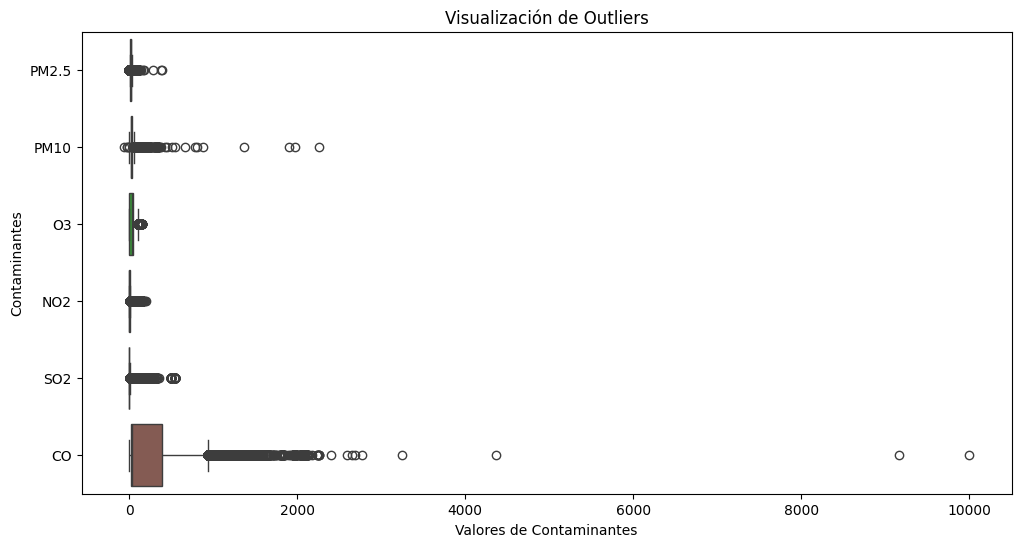

In [32]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['PM2.5', 'PM10', 'O3', 'NO2', 'SO2', 'CO']], orient='h')
plt.title('Visualización de Outliers')
plt.xlabel('Valores de Contaminantes')
plt.ylabel('Contaminantes')
plt.show()

In [33]:
# Función para eliminar outliers aplicando el método IQR
def eliminar_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

for contaminante in ['PM2.5', 'PM10', 'O3', 'NO2', 'SO2', 'CO']:
    df = eliminar_outliers(df, contaminante)

A continuación verificaremos como se visualizan ahora, después de haber eliminado los outliers.

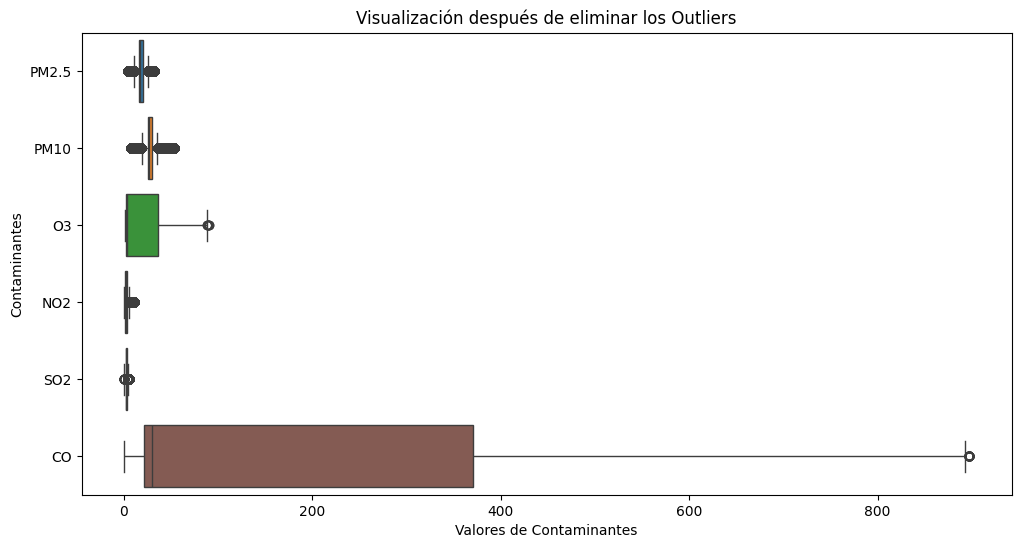

In [34]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['PM2.5', 'PM10', 'O3', 'NO2', 'SO2', 'CO']], orient='h')
plt.title('Visualización después de eliminar los Outliers')
plt.xlabel('Valores de Contaminantes')
plt.ylabel('Contaminantes')
plt.show()

In [35]:
def obtener_calidad_aire(pm25, pm10, o3, no2, so2, co):
    if pm25 <= 25 and pm10 <= 50 and o3 <= 0.051 and no2 <= 0.107 and so2 <= 0.008 and co <= 8.75:
        return 'buena'
    elif pm25 <= 45 and pm10 <= 75 and o3 <= 0.070 and no2 <= 0.120 and so2 <= 0.110 and co <= 11.0:
        return 'aceptable'
    elif pm25 <= 79 and pm10 <= 155 and o3 <= 0.092 and no2 <= 0.230 and so2 <= 0.165 and co <= 13.30:
        return 'mala'
    elif pm25 <= 147 and pm10 <= 235 and o3 <= 0.114 and no2 <= 0.250 and so2 <= 0.220 and co <= 15.50:
        return 'muy mala'
    else:
        return 'extremadamente mala'

In [36]:
# Normalización de los datos
contaminantes = ['PM2.5', 'PM10', 'O3', 'NO2', 'SO2', 'CO']
scaler = StandardScaler()
df[contaminantes] = scaler.fit_transform(df[contaminantes])

In [37]:
# Determinar la calidad del aire para cada registro
df['calidad_aire'] = df.apply(lambda row: obtener_calidad_aire(row['PM2.5'], row['PM10'], row['O3'], row['NO2'], row['SO2'], row['CO']), axis=1)

In [38]:
df

,FECHA,CO,O3,SO2,NO2,PM10,PM2.5,calidad_aire
0,2000-01-01 00:00:03.000,-0.785796,-0.870194,0.512133,-0.028382,1.498172,1.678598,extremadamente mala
1,2000-01-01 00:00:05.000,-0.790945,-0.852817,0.397747,0.337102,1.182707,1.169681,extremadamente mala
2,2000-01-01 00:00:24.000,-0.800452,-0.848473,0.054591,-0.185018,1.272840,1.190037,aceptable
3,2000-01-01 00:01:06.000,-0.786192,-0.870194,-0.746106,-1.020409,0.747065,1.067896,buena
5,2000-01-01 00:01:25.000,-0.806394,-0.813718,0.168977,0.389314,1.242795,1.149322,extremadamente mala
...,...,...,...,...,...,...,...,...
3830320,2024-06-19 10:20:39.000,0.335638,0.589513,-0.746106,-0.393866,-3.399038,-3.084874,extremadamente mala
3830321,2024-06-19 10:21:39.000,0.321378,0.641645,-0.746106,-1.020409,-3.579303,-3.084874,extremadamente mala
3830322,2024-06-19 10:21:40.000,-0.786192,-0.818062,0.626517,0.232678,-0.875323,-1.619190,extremadamente mala
3830323,2024-06-19 10:22:40.000,0.321378,0.589513,-0.746106,0.232678,-3.579303,-3.084874,extremadamente mala


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2171021 entries, 0 to 3830324
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   FECHA         object 
 1   CO            float64
 2   O3            float64
 3   SO2           float64
 4   NO2           float64
 5   PM10          float64
 6   PM2.5         float64
 7   calidad_aire  object 
dtypes: float64(6), object(2)
memory usage: 149.1+ MB


In [40]:
df.describe()

,CO,O3,SO2,NO2,PM10,PM2.5
count,2.171021e+06,2.171021e+06,2.171021e+06,2.171021e+06,2.171021e+06,2.171021e+06
mean,-2.939020e-17,1.043483e-15,-1.147036e-15,-5.570850e-16,3.725394e-15,-4.773125e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-9.097831e-01,-9.266713e-01,-3.262581e+00,-1.646953e+00,-3.714503e+00,-3.451294e+00
25%,-8.067902e-01,-8.658501e-01,-7.461057e-01,-6.027133e-01,-4.847473e-01,-5.809977e-01
50%,-7.699505e-01,-8.006846e-01,5.459071e-02,-1.850179e-01,-1.542614e-01,-2.960029e-01
75%,8.498105e-01,9.370626e-01,6.265175e-01,2.848899e-01,2.813805e-01,3.350545e-01
max,3.355706e+00,3.756557e+00,3.486149e+00,5.401664e+00,4.610729e+00,3.388562e+00


## Modelo

In [41]:
# Definir las características (X) y la etiqueta (y)
contaminantes = ['PM2.5', 'PM10', 'O3', 'NO2', 'SO2', 'CO']

X = df[contaminantes]
y = df['calidad_aire']

# División los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [42]:
clf = RandomForestClassifier(random_state=50)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=50)

## Evaluación

In [43]:
y_pred = clf.predict(X_test)
report = classification_report(y_test, y_pred, target_names=['buena', 'aceptable', 'mala', 'muy mala', 'extremadamente mala'])
print(report)

                     precision    recall  f1-score   support

              buena       1.00      1.00      1.00     12179
          aceptable       1.00      1.00      1.00    214645
               mala       1.00      1.00      1.00    822779
           muy mala       1.00      1.00      1.00      7528
extremadamente mala       1.00      1.00      1.00     28380

           accuracy                           1.00   1085511
          macro avg       1.00      1.00      1.00   1085511
       weighted avg       1.00      1.00      1.00   1085511



# Juan Manuel Huerta Ordaz